# import data JSON

Import data json disini menggunakan pandas,yaitu read_json()

In [1]:
import pandas as pd
import json

In [2]:
with open('../dataset/Tensi_Skripsi.json', 'r') as f:
    data = json.load(f)

In [3]:
data

[{'kategori': 'Greeting',
  'pertanyaan': ['baik',
   'baik-baik saja',
   'sangat baik',
   'aku baik',
   'aku baik-baik saja',
   'aku merasa baik',
   'Kabar saya baik',
   'Kabar saya baik-baik saja',
   'Saya merasa sangat baik',
   'Saya sehat-sehat saja',
   'Saya merasa baik-baik saja, terima kasih',
   'Alhamdulillah, kabar saya baik',
   'Kabar saya cukup baik',
   'Saya dalam keadaan baik',
   'Saya merasa baik dan sehat',
   'sehat',
   'sangat sehat',
   'aku merasa sehat',
   'Saya merasa sangat sehat',
   'Alhamdulillah, saya dalam keadaan sehat',
   'Kabar saya baik-baik saja, dan kesehatan saya juga baik-baik saja',
   'Saya dalam kondisi sehat',
   'Saya merasa sehat dan bugar',
   'Kondisi kesehatan saya cukup baik',
   'Saya merasa sehat dan kuat',
   'Lagi oke-oke aja nih kak',
   'tidak enak badan',
   'kurang enak badan',
   'sakit',
   'tidak sehat',
   'aku sedang tidak sehat',
   'aku kurang sehat',
   'tidak baik',
   'tidak enak badan',
   'kurang baik',
  

# Mengubah data JSON ke dalam bentuk DataFrame

Mengubah data json kedalam bentuk DataFrame 

Dataframe merupakan data yang berbentuk tabel

In [8]:
kategori = []
pertanyaan = []
jawaban={}
for intent in data:
    jawaban[intent['kategori']]=intent['jawaban']
    for lines in intent['pertanyaan']:
        pertanyaan.append(lines)
        kategori.append(intent['kategori'])

In [9]:
df = pd.DataFrame({"kategori":kategori, "pertanyaan":pertanyaan})

In [10]:
#menampilkan dataframe
df

,kategori,pertanyaan
0,Greeting,baik
1,Greeting,baik-baik saja
2,Greeting,sangat baik
3,Greeting,aku baik
4,Greeting,aku baik-baik saja
...,...,...
1637,about_Amlodipine,Tolong jelaskan efek samping yang terkait deng...
1638,about_Amlodipine,Apa efek negatif yang mungkin muncul akibat am...
1639,about_Amlodipine,Saya belum mengetahui efek samping apa yang da...
1640,about_Amlodipine,Efek samping apa yang umum terjadi setelah men...


# Preprocessing Data

In [13]:
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Remove Punctuation

Remove punctuation berfungsi untuk menghilangkan tanda baca yang terdapat di dalam kalimat

Ex: "Siapa yang membuat tensibot?" ==> "Siapa yang membuat tensbot"

dari contoh yang ada dapat kita lihat bahwa tanda baca menjadi hilang

In [14]:
separator = '|'
hapus_tandabaca = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'
delete =str.maketrans(dict.fromkeys(hapus_tandabaca,''))

In [15]:
df['pertanyaan'] = separator \
    .join(df['pertanyaan'].tolist()) \
    .translate(delete) \
    .split(separator)

In [16]:
#Menampilkan data pertanyaaan yang telah di remove tanda baca
print(df['pertanyaan'])

0                                                    baik
1                                           baikbaik saja
2                                             sangat baik
3                                                aku baik
4                                       aku baikbaik saja
                              ...                        
1637    Tolong jelaskan efek samping yang terkait deng...
1638    Apa efek negatif yang mungkin muncul akibat am...
1639    Saya belum mengetahui efek samping apa yang da...
1640    Efek samping apa yang umum terjadi setelah men...
1641    Mohon beri saya informasi mengenai efek sampin...
Name: pertanyaan, Length: 1642, dtype: object


## Stemming

Stemming berfungsi untuk mengubah suatu kata menjadi kata dasar. 

Ex: "Memakan" ==> "Makan"

dapat kita lihat dari contoh dimana kata "Memakan" menjadi kata dasarnya yaitu "Makan". proses stemming disini menggunakan sastrawi

In [17]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Melakukan lemmatization pada setiap baris di kolom 'question', 
df['pertanyaan'] = df['pertanyaan'].apply(lambda x: stemmer.stem(x))

In [18]:
# Menampilkan data yang telah di stemming menggunakan sastrawi
print(df['pertanyaan'])

0                                                    baik
1                                           baikbaik saja
2                                             sangat baik
3                                                aku baik
4                                       aku baikbaik saja
                              ...                        
1637    tolong jelas efek samping yang kait dengan gun...
1638    apa efek negatif yang mungkin muncul akibat am...
1639    saya belum tahu efek samping apa yang dapat ja...
1640    efek samping apa yang umum jadi telah konsumsi...
1641    mohon beri saya informasi kena efek samping am...
Name: pertanyaan, Length: 1642, dtype: object


## Stopword

In [19]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# # Membuat objek stopword remover
# factory = StopWordRemoverFactory()
# stopword = factory.create_stop_word_remover()

# # Menghilangkan stopwords dari setiap baris teks
# df['pertanyaan'] = df['pertanyaan'].apply(lambda x: stopword.remove(x))

In [20]:
# # Menampilkan hasil data setelah di stopword
# print(df['pertanyaan'].head(50))

## Tokenizing

In [21]:
# Membuat fungsi tokenize untuk melakukan proses tokenizing menggunakan regex
def tokenize(questions):
    # Menggunakan \w+ untuk mencocokkan semua kecocokan karakter huruf 
    #dan angka, yang diinterpretasikan sebagai kata-kata
    tokens = re.findall(r'\w+', questions)
    return tokens

# Menerapkan fungsi tokenisasi ke setiap baris teks dalam kolom questions
df['pertanyaan'] = df['pertanyaan'].apply(tokenize)

In [22]:
print (df['pertanyaan'])

0                                                  [baik]
1                                        [baikbaik, saja]
2                                          [sangat, baik]
3                                             [aku, baik]
4                                   [aku, baikbaik, saja]
                              ...                        
1637    [tolong, jelas, efek, samping, yang, kait, den...
1638    [apa, efek, negatif, yang, mungkin, muncul, ak...
1639    [saya, belum, tahu, efek, samping, apa, yang, ...
1640    [efek, samping, apa, yang, umum, jadi, telah, ...
1641    [mohon, beri, saya, informasi, kena, efek, sam...
Name: pertanyaan, Length: 1642, dtype: object


In [23]:
vocabs = []

for x in df.pertanyaan:
    for y in x:
        vocabs.append(y)

In [24]:
len(vocabs)

9989

In [25]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [26]:
vocabs = unique(vocabs)

In [27]:
len(vocabs)

422

In [28]:
# menampilkan data yang telah di tokenizing
print(df['pertanyaan'])

0                                                  [baik]
1                                        [baikbaik, saja]
2                                          [sangat, baik]
3                                             [aku, baik]
4                                   [aku, baikbaik, saja]
                              ...                        
1637    [tolong, jelas, efek, samping, yang, kait, den...
1638    [apa, efek, negatif, yang, mungkin, muncul, ak...
1639    [saya, belum, tahu, efek, samping, apa, yang, ...
1640    [efek, samping, apa, yang, umum, jadi, telah, ...
1641    [mohon, beri, saya, informasi, kena, efek, sam...
Name: pertanyaan, Length: 1642, dtype: object


# MODEL

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Mengubah data Hasil Tokenize Kedalam Bentuk Numerik

In [39]:
#Membuat objek CountVectorizer
vectorizer = CountVectorizer()

#Mengubah data tokenized menjadi bentuk numerik dengan menggunakan fit_transform
data_numerik = vectorizer.fit_transform(df['pertanyaan'].apply(lambda x: " ".join(x)))

#  Membuat dataframe baru yang berisi data numerik
X = pd.DataFrame(data_numerik.toarray(), columns=vectorizer.get_feature_names_out())


In [40]:
# Menampilkan hasil Data Numerik
X

,ada,adalah,agar,ah,aja,akhir,akhirakhir,akibat,aktifitas,aktivitas,...,usah,usia,utama,wah,waktu,walafiat,waspada,ya,yaa,yang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1638,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
tensibot = X['tensibot']

tensibot [89:]

89      0
90      0
91      0
92      0
93      0
       ..
1637    0
1638    0
1639    0
1640    0
1641    0
Name: tensibot, Length: 1553, dtype: int64

In [42]:
X['tesibot']

0       0
1       0
2       0
3       0
4       0
       ..
1637    0
1638    0
1639    0
1640    0
1641    0
Name: tesibot, Length: 1642, dtype: int64

In [43]:
# mencari index dengan kata yang memiliki nilai == 1
index = []
n =  X['tensibot']
for i in range(len(X)):
    if n[i] == 1 or n[i] == 2:
        index.append(i)

In [44]:
# Menampilkan index data pertanyaan dengan kata "tensibot"
index[:25]

[143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 161,
 164,
 165,
 166,
 167,
 168,
 169,
 172,
 173]

|

In [45]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

In [46]:
from sklearn.model_selection import train_test_split

# Memisahkan data numerik (fitur) dan label
X = pd.DataFrame(data_numerik.toarray(), columns=vectorizer.get_feature_names_out())
y = df['kategori']

# Melakukan split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
# # Menampilkan hasil split data
# print("Data Latih:")
# print(X_train)
# print(y_train)

# print("\nData Uji:")
# print(X_test)
# print(y_test)

In [48]:
# import numpy as np

# class MultinomialNaiveBayes:
#     def __init__(self):
#         self.class_prior_prob = {}
#         self.feature_likelihood = {}
#         self.classes = []
    
#     def fit(self, X_train, y_train):
#         self.classes = np.unique(y_train)
        
#         # Menghitung class prior probability
#         total_samples = len(y_train)
#         for class_label in self.classes:
#             class_samples = np.sum(y_train == class_label)
#             self.class_prior_prob[class_label] = class_samples / total_samples
        
#         # Menghitung feature likelihood
#         num_features = X_train.shape[1]
#         for class_label in self.classes:
#             class_samples = X_train[y_train == class_label]
#             total_count = np.sum(class_samples)
#             self.feature_likelihood[class_label] = (np.sum(class_samples, axis=0) + 1) / (total_count + num_features)
    
#     def predict(self, X_test):
#         predictions = []
        
#         for sample in X_test:
#             posterior_probs = []
            
#             for class_label in self.classes:
#                 prior_prob = self.class_prior_prob[class_label]
#                 likelihood = self.feature_likelihood[class_label]
#                 posterior_prob = np.log(prior_prob) + np.sum(np.log(likelihood) * sample)
#                 posterior_probs.append(posterior_prob)
            
#             predicted_class = self.classes[np.argmax(posterior_probs)]
#             predictions.append(predicted_class)
        
#         return predictions

In [49]:
# # Membuat objek Multinomial Naive Bayes
# naive_bayes = MultinomialNaiveBayes()

# # Melatih model menggunakan data pelatihan
# naive_bayes.fit(X_train.values, y_train.values)

# # Memprediksi kelas untuk data uji
# y_pred = naive_bayes.predict(X_test.values)

# # Evaluasi akurasi
# accuracy = np.mean(y_pred == y_test)
# print("Akurasi: ", accuracy)

# =============================================================

In [50]:
# import numpy as np

# class MultinomialNaiveBayes:
#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         self.class_probs = {}
#         self.feature_probs = {}
        
#         # Menghitung prior probability untuk setiap kelas
#         for class_label in self.classes:
#             class_instances = X[y == class_label]
#             self.class_probs[class_label] = len(class_instances) / len(X)
            
#             # Menghitung likelihood probability untuk setiap fitur
#             feature_counts = np.sum(class_instances, axis=0)
#             total_count = np.sum(feature_counts)
#             self.feature_probs[class_label] = (feature_counts + 1) / (total_count + len(X))
    
#     def predict(self, X):
#         predictions = []
#         for instance in X:
#             instance_probs = []
#             for class_label in self.classes:
#                 class_prob = np.log(self.class_probs[class_label])
#                 feature_probs = self.feature_probs[class_label]
#                 instance_prob = np.sum(np.log(feature_probs) * instance)
#                 instance_probs.append(class_prob + instance_prob)
#             predicted_class = self.classes[np.argmax(instance_probs)]
#             predictions.append(predicted_class)
#         return predictions

# def calculate_metrics(y_true, y_pred):
#     tp = 0
#     fp = 0
#     fn = 0

#     for i in range(len(y_true)):
#         if y_true[i] == y_pred[i]:
#             if y_true[i] == 'kabar_tidak_baik':
#                 tp += 1
#         else:
#             if y_true[i] == 'kabar_tidak_baik':
#                 fn += 1
#             else:
#                 fp += 1
    
#     precision = tp / (tp + fp) if (tp + fp) != 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) != 0 else 0
#     f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

#     return precision, recall, f1_score

# # Melatih model Multinomial Naive Bayes
# naive_bayes = MultinomialNaiveBayes()
# naive_bayes.fit(X_train.values, y_train.values)

# # Melakukan prediksi pada data uji
# y_pred = naive_bayes.predict(X_test.values)

# # Menghitung precision, recall, dan f1-score
# precision, recall, f1_score = calculate_metrics(y_test.values, y_pred)

# # Menampilkan hasil precision, recall, dan f1-score
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1_score)


# ================================================

In [51]:
# import numpy as np

# class MultinomialNaiveBayes:
    
#     def fit(self, X, y):
#         self.classes = np.unique(y)
#         self.class_probs = {}
#         self.feature_probs = {}
        
#         # Menghitung prior probability untuk setiap kelas
#         for class_label in self.classes:
#             class_instances = X[y == class_label]
#             self.class_probs[class_label] = len(class_instances) / len(X)
            
#             # Menghitung likelihood probability untuk setiap fitur
#             feature_counts = np.sum(class_instances, axis=0)
#             total_count = np.sum(feature_counts)
#             self.feature_probs[class_label] = (feature_counts + 1) / (total_count + len(X))
    
#     def predict(self, X):
#         predictions = []
#         for instance in X:
#             instance_probs = []
#             for class_label in self.classes:
#                 class_prob = np.log(self.class_probs[class_label])
#                 feature_probs = self.feature_probs[class_label]
#                 instance_prob = np.sum(np.log(feature_probs) * instance)
#                 instance_probs.append(class_prob + instance_prob)
#             predicted_class = self.classes[np.argmax(instance_probs)]
#             predictions.append(predicted_class)
#         return predictions


In [52]:
# # Melatih model Multinomial Naive Bayes
# naive_bayes = MultinomialNaiveBayes()
# naive_bayes.fit(X_train.values, y_train.values)

# # Melakukan prediksi pada data uji
# y_pred = naive_bayes.predict(X_test.values)

# # Menghitung precision, recall, dan f1-score
# metrics = calculate_metrics(y_test.values, y_pred, naive_bayes.classes)

# # Menampilkan hasil precision, recall, dan f1-score untuk setiap kelas
# for class_label, class_metrics in metrics.items():
#     print("Class:", class_label)
#     print("Precision:", class_metrics["Precision"])
#     print("Recall:", class_metrics["Recall"])
#     print("F1-Score:", class_metrics["F1-Score"])
#     print()

In [53]:
# # Evaluasi akurasi
# accuracy = np.mean(y_pred == y_test)
# print("Akurasi: ", accuracy)

# =============================================================

In [54]:
import numpy as np

# Buat __init__

class MultinomialNaiveBayes:
    def calculate_prior_probability(self, y):
        classes, class_counts = np.unique(y, return_counts=True)
        prior_probs = {}
        total_instances = len(y)
        for class_label, class_count in zip(classes, class_counts):
            prior_probs[class_label] = class_count / total_instances
        return prior_probs
    
    def calculate_likelihood(self, X, y):
        classes, class_counts = np.unique(y, return_counts=True)
        likelihood_probs = {}
        num_features = X.shape[1]
        for class_label, class_count in zip(classes, class_counts):
            class_instances = X[y == class_label]
            feature_counts = np.sum(class_instances, axis=0)
            total_counts = np.sum(feature_counts)
            likelihood_probs[class_label] = (feature_counts + 1) / (total_counts + num_features)
        return likelihood_probs
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.prior_probs = self.calculate_prior_probability(y)
        self.likelihood_probs = self.calculate_likelihood(X, y)
    
    def predict(self, X):
        predictions = []
        for instance in X:
            instance_probs = []
            for class_label in self.classes:
                class_prob = np.log(self.prior_probs[class_label])
                likelihood_probs = self.likelihood_probs[class_label]
                instance_prob = np.sum(np.log(likelihood_probs) * instance)
                instance_probs.append(class_prob + instance_prob)
            predicted_class = self.classes[np.argmax(instance_probs)]
            predictions.append(predicted_class)
        return predictions


In [55]:
def calculate_metrics(y_true, y_pred, classes):
    metrics = {}
    
    for class_label in classes:
        tp = 0
        fp = 0
        fn = 0
        
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                if y_true[i] == class_label:
                    tp += 1
            else:
                if y_true[i] == class_label:
                    fn += 1
                else:
                    fp += 1
        
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        metrics[class_label] = {
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score
        }
    
    return metrics

In [56]:
X_test.values[162]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
len([X_test.values[162]])

1

In [58]:
naive_bayes.predict([X_test.values[162]])

NameError: name 'naive_bayes' is not defined

In [59]:
# Membuat objek MultinomialNaiveBayes
naive_bayes = MultinomialNaiveBayes()

# Melatih model menggunakan data pelatihan
naive_bayes.fit(X_train.values, y_train.values)

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test.values)

# Menghitung metrik precision, recall, dan F1-score
metrics = calculate_metrics(y_test.values, y_pred, naive_bayes.classes)

# Menampilkan hasil akurasi, precision, recall, dan F1-score
for class_label, class_metrics in metrics.items():
    print(f"Class: {class_label}")
    print(f"Precision: {class_metrics['Precision']}")
    print(f"Recall: {class_metrics['Recall']}")
    print(f"F1-Score: {class_metrics['F1-Score']}")
    print()

Class: Greeting
Precision: 0.7368421052631579
Recall: 1.0
F1-Score: 0.8484848484848484

Class: about_Amlodipine
Precision: 0.873015873015873
Recall: 0.9649122807017544
F1-Score: 0.9166666666666667

Class: about_Catopril
Precision: 0.8048780487804879
Recall: 0.9428571428571428
F1-Score: 0.868421052631579

Class: about_Hidroclorthiazide
Precision: 0.8840579710144928
Recall: 0.9682539682539683
F1-Score: 0.9242424242424243

Class: bye
Precision: 0.5652173913043478
Recall: 1.0
F1-Score: 0.7222222222222222

Class: cek_tekanan_darah
Precision: 0.6153846153846154
Recall: 1.0
F1-Score: 0.761904761904762

Class: gejala
Precision: 0.35714285714285715
Recall: 0.8333333333333334
F1-Score: 0.5

Class: info_hipertensi
Precision: 0.8529411764705882
Recall: 1.0
F1-Score: 0.9206349206349206

Class: info_kegiatan_minumlkohol
Precision: 0.0
Recall: 0
F1-Score: 0

Class: info_kegiatan_olahraga
Precision: 0.0
Recall: 0
F1-Score: 0

Class: info_perokok_aktif
Precision: 0.0
Recall: 0.0
F1-Score: 0

Class: inf

In [60]:
# Evaluasi akurasi
accuracy = np.mean(y_pred == y_test)
print("Akurasi: ", accuracy)

Akurasi:  0.9696048632218845


# =============================================================

## Visualisasi

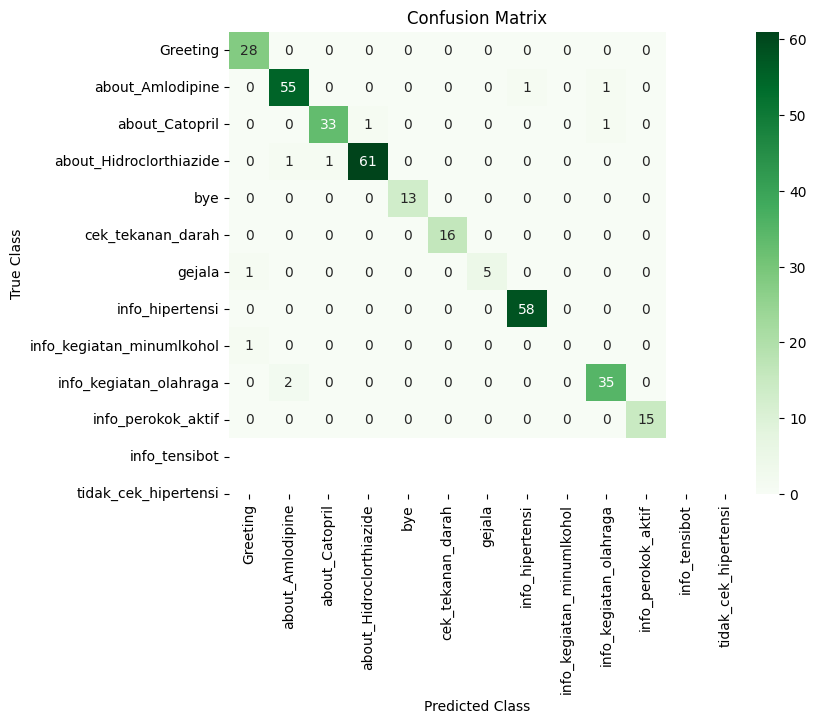

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", xticklabels=naive_bayes.classes, yticklabels=naive_bayes.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [64]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

               Greeting       0.93      1.00      0.97        28
       about_Amlodipine       0.95      0.96      0.96        57
         about_Catopril       0.97      0.94      0.96        35
about_Hidroclorthiazide       0.98      0.97      0.98        63
                    bye       1.00      1.00      1.00        13
      cek_tekanan_darah       1.00      1.00      1.00        16
                 gejala       1.00      0.83      0.91         6
        info_hipertensi       0.98      1.00      0.99        58
     info_perokok_aktif       0.00      0.00      0.00         1
          info_tensibot       0.95      0.95      0.95        37
   tidak_cek_hipertensi       1.00      1.00      1.00        15

               accuracy                           0.97       329
              macro avg       0.89      0.88      0.88       329
           weighted avg       0.97      0.97      0.97       329



C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1469: Undefin

## Uji Coba Model

# Uji Coba Chatbot

In [65]:
# ques = ["Apakah kamu rutin berolahraga atau melakukan  aktifitas?"," Apakah kamu perokok atau sering menghisap asap rokok?", " apakah kamu pernah/sering meminum alkohol (Minuman Keras)?", " Apa gejala yang kamu rasakan akhir-akhir ini? \n- sakit kepala \n- pusing \n- gelisah \n- penglihatan kabur \n- mudah lelah \n-  jantung berdebar-deba \n- sakit dada \n- tidak ada gejala \n- lainnya", "Apakah kamu ingin memeriksa tekanan darah? (Ya ingin/Tidak ingin)"]

In [66]:

# req_in = []
# for i in ques:
#     print(i)
#     inp = input("masukan: ")
#     req_in.append(inp)